# Figure 5

In this notebook we produce figure 5 from Donald-McCann, Koyama, Beutler (in-prep).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

As with most of the other notebooks in this repo we start by specifying the repo location.

In [2]:
path_to_repo = "/Users/jamie/Desktop/GitHubProjects/matryoshka_II_paper/"

Next we load the chains from all the MCMC runs at $z=0.61$.

In [3]:
chains = []
for V in [1000, 2000, 3000, 3700, 4000, 5000]:
    fname = path_to_repo+"results/chain--EFTEMU_z-0.61_V-{V}_kmin-def_kmax-def_0.npy".format(V=V)
    chains.append(np.load(fname))

We also define our truths, 

In [4]:
cosmo_true = np.array([0.11933, 0.02242, 0.6766, 3.047, 0.9665])
truths = cosmo_true[[0,2,3]]

and our priors on the cosmlogical parameters. It should be noted that the prior on $\omega_c$ is smaller than that defined by the training space, this is due to the projection of the prior on $\omega_b$.

In [5]:
path_to_train = path_to_repo+"data/training/"
cosmos = np.load(path_to_train+"cosmologies/eft_cosmologies_noDQ1.npy")
priors = np.vstack([cosmos.min(axis=0), cosmos.max(axis=0)]).T
priors = priors[[0,2,3]]
priors[0,0] = 0.109988
priors[0,1] = 0.129229

Now we produce our violin plot.

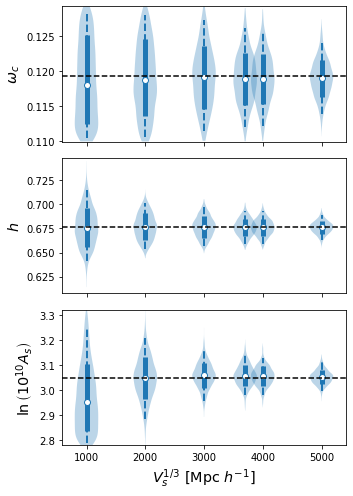

In [6]:
vols = [1000, 2000, 3000, 3700, 4000, 5000]
labels = [r"$\omega_c$", r"$h$", r"$\ln{\left(10^{10}A_s\right)}$"]

fig, ax = plt.subplots(3,1,sharex=True, figsize=(5,7))

for i, axi in enumerate(ax):
    # Plots the shaded regions.
    axi.violinplot([chains[0][:,i], chains[1][:,i], chains[2][:,i], chains[3][:,i], chains[4][:,i], chains[5][:,i]], 
                   showextrema=False, positions=vols, widths=400)
    for j, sample in enumerate(chains):
        # Computes the extremes of the 1sigma and 2sigma regions.
        q1, q2, med, q3, q4 = np.percentile(sample[:,i], [2.5, 16, 50, 100-16, 100-2.5])
        
        # Plot the 1sigma region as thick line.
        axi.vlines(vols[j], q2, q3, lw=5)
        
        # Plot the 2sigma region as dashed line.
        axi.vlines(vols[j], q1, q4, lw=2, linestyle='--')
        
        # Plot the median.
        axi.plot(vols[j], med, linestyle='none', marker='o', mfc='white', mec='tab:blue')
        
    # Add the truth.
    axi.axhline(truths[i], linestyle='--', color='k')
    
    axi.set_ylabel(labels[i], fontsize='x-large')
    
    # Impose the priors only where needed.
    ylim = axi.get_ylim()
    axi.set_ylim(max(priors[i,0], ylim[0]), min(priors[i,1], ylim[1]))
    
ax[-1].set_xlabel(r"$V_s^{1/3}\ [\mathrm{Mpc}\ h^{-1}]$", fontsize='x-large')

plt.tight_layout()
plt.savefig(path_to_repo+"plots/violins_volumes.png", dpi=300, facecolor='white')